# EDA Climate Change in the United States
## (1961 - 2019 Trends)

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [329]:
enviro = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv")
display(enviro.head())

for i, col in enumerate(enviro.columns):
    print(f"{i}: {col}")

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,∞C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,∞C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,∞C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,∞C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,∞C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


0: Area Code
1: Area
2: Months Code
3: Months
4: Element Code
5: Element
6: Unit
7: Y1961
8: Y1962
9: Y1963
10: Y1964
11: Y1965
12: Y1966
13: Y1967
14: Y1968
15: Y1969
16: Y1970
17: Y1971
18: Y1972
19: Y1973
20: Y1974
21: Y1975
22: Y1976
23: Y1977
24: Y1978
25: Y1979
26: Y1980
27: Y1981
28: Y1982
29: Y1983
30: Y1984
31: Y1985
32: Y1986
33: Y1987
34: Y1988
35: Y1989
36: Y1990
37: Y1991
38: Y1992
39: Y1993
40: Y1994
41: Y1995
42: Y1996
43: Y1997
44: Y1998
45: Y1999
46: Y2000
47: Y2001
48: Y2002
49: Y2003
50: Y2004
51: Y2005
52: Y2006
53: Y2007
54: Y2008
55: Y2009
56: Y2010
57: Y2011
58: Y2012
59: Y2013
60: Y2014
61: Y2015
62: Y2016
63: Y2017
64: Y2018
65: Y2019


There are 284 Countries in this dataset! Wow that is a lot. Next I want to:
- Check the different units used to measure temperature (C/F)
- If celsius only then convert to farenheight
- Include only results where Element is temperature change
- Create a Time Series Graph to examine the change in temperature of the United States over the years

In [330]:
print(enviro.Unit.unique())

['∞C']


We Need to Convert the change in Celsius to the change in Farenheit using the following formula:

### Δ°C × 1.8 = Δ°F
#### (Not the same formula as standard Celsius to Farenheit conversion)

In [331]:
for i, col in enumerate(enviro.columns):
    if i >= 7:
        enviro[col] = (enviro[col] * 1.8)

In [332]:
print(enviro.Y1961.head())

0    1.3986
1    3.5100
2   -3.1374
3    4.6746
4    0.9288
Name: Y1961, dtype: float64


Next we only want the rows that include temperature change. We want to exclude all rows that contain the standard deviation for time series data

In [333]:
enviro1 = enviro[enviro.Element == "Temperature change"]

In [334]:
display(enviro1.head())

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,∞C,1.3986,0.1116,4.9392,...,6.4818,2.1222,-1.0494,2.2194,3.1590,3.4974,6.1488,2.1618,3.5928,5.3118
2,2,Afghanistan,7002,February,7271,Temperature change,∞C,-3.1374,4.4370,7.0542,...,2.1816,0.5778,-5.7618,2.6892,-5.7366,4.8582,4.0518,-0.5814,4.8690,0.1548
4,2,Afghanistan,7003,March,7271,Temperature change,∞C,0.9288,2.4048,0.7254,...,6.1020,1.3464,-0.9486,4.0428,-0.1368,-0.8946,4.1328,1.5012,7.9524,0.4212
6,2,Afghanistan,7004,April,7271,Temperature change,∞C,-3.0762,0.2106,1.6542,...,4.6638,3.0816,2.5506,-0.0936,1.0530,2.8602,1.7640,2.2536,2.5956,1.6182
8,2,Afghanistan,7005,May,7271,Temperature change,∞C,2.5416,-0.1656,-1.2420,...,2.5542,6.5574,1.6362,2.1618,1.7262,3.3516,5.8428,5.9040,1.5390,1.1646


Now we can use a groupby function to group each country together and find the average temperature change per year. We also want to discard the "Y" character in each column

In [335]:
countries_grouped = enviro1.groupby("Area").mean().reset_index()

countries_grouped = enviro1.groupby("Area").mean().reset_index()

for col in countries_grouped.columns:
    if "Y" in col:
        new_col = col.replace("Y", "")
        countries_grouped.rename(columns={col: new_col}, inplace=True)

In [336]:
display(countries_grouped.head(10))
print(countries_grouped[countries_grouped.Area == "United States of America"])

,Area,Area Code,Months Code,Element Code,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,2.0,7009.882353,7271.0,0.050294,-0.355447,1.599671,-1.630165,-0.093282,0.399812,...,2.698624,2.243012,0.323576,2.253071,0.876600,1.976929,3.009388,2.352176,2.834471,1.619259
1,Africa,5100.0,7009.882353,7271.0,-0.160200,-0.011435,0.139447,-0.341047,-0.351529,0.264071,...,2.732506,1.607294,1.466894,1.804235,1.888518,2.174294,2.671094,2.139565,2.224906,2.570400
2,Albania,3.0,7009.882353,7271.0,0.851824,0.430094,0.458365,-0.354812,-0.650859,0.828529,...,2.175671,2.047976,2.723824,2.775071,2.639753,3.041047,2.908800,2.549753,3.971541,3.652200
3,Algeria,4.0,7009.882353,7271.0,0.543706,0.053471,0.318282,0.101753,-0.112235,0.576741,...,4.201200,2.437729,2.265882,2.203941,3.190553,2.313424,3.439376,2.733459,2.527835,2.321153
4,American Samoa,5.0,7009.882353,7271.0,-0.052094,-0.190800,0.173647,-0.495953,-0.744141,0.239929,...,1.960835,1.538280,1.689600,2.100360,1.952862,1.514769,2.816723,2.287800,2.015308,2.638662
5,Americas,5200.0,7009.882353,7271.0,-0.010694,-0.032294,0.382341,-0.556518,-0.373976,-0.230824,...,2.441224,1.627200,2.374306,1.417976,1.518565,2.516294,2.996471,2.486329,1.741553,2.245447
6,Andorra,6.0,7009.882353,7271.0,1.712965,-0.188788,-1.314212,0.591776,-0.606706,0.665682,...,0.639741,3.293682,2.147294,1.354129,3.398082,3.248682,3.222953,3.161012,3.598624,3.493165
7,Angola,7.0,7009.882353,7271.0,0.033565,-0.244059,-0.285565,-0.458576,-0.273388,0.364871,...,1.903129,1.202612,0.823341,1.628894,1.349153,2.293200,2.743306,1.447835,2.297329,3.111988
8,Anguilla,258.0,7009.882353,7271.0,0.156812,0.132882,0.549529,0.222565,-0.474776,0.007094,...,1.555200,0.664729,0.976447,1.149247,1.166294,1.725247,1.694753,1.425494,1.047176,1.614494
9,Annex I countries,5848.0,7009.882353,7271.0,0.671929,0.296682,0.234635,-0.675741,-0.536824,0.374718,...,2.212835,2.158624,2.477753,2.170588,2.086306,3.020506,3.505659,3.070165,2.441012,3.044753


                         Area  Area Code  Months Code  Element Code      1961  \
267  United States of America      231.0  7009.882353        7271.0 -0.184659   

         1962      1963      1964      1965      1966  ...      2010  \
267  0.182647  0.575894 -0.526341 -0.391871 -0.526129  ...  1.223576   

         2011      2012      2013      2014      2015      2016      2017  \
267  1.210341  2.512906  0.924459  1.167353  2.751565  3.671365  2.709741   

         2018      2019  
267  2.198224  1.843729  

[1 rows x 63 columns]


Now we create a scatterplot in the form of a time series with United States Temperature Data

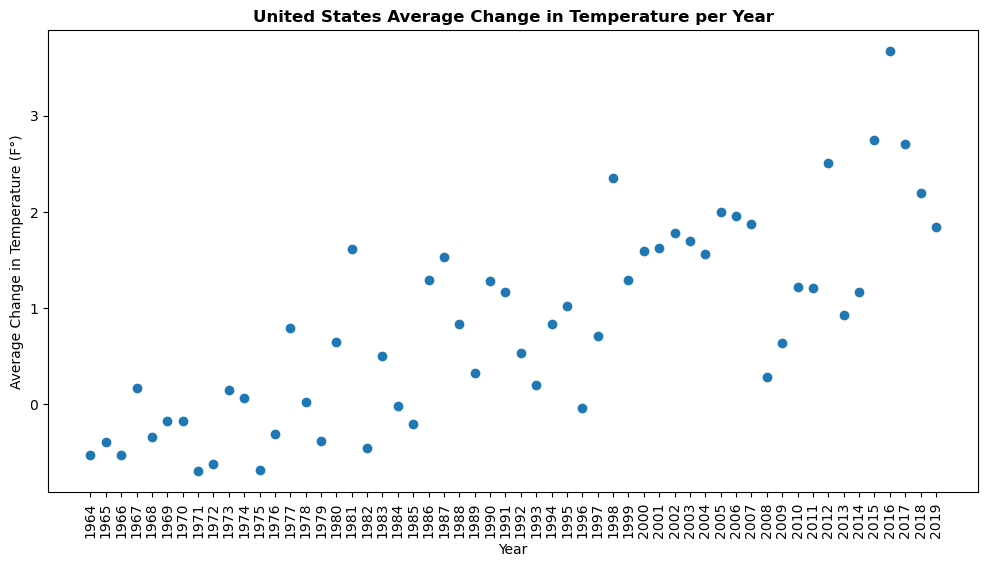

In [341]:
row_index = 267

xcols = countries_grouped.columns[7:]
yvals = countries_grouped.iloc[row_index, 7:]

xcols1 = range(len(xcols))

plt.figure(figsize=(12, 6))
plt.scatter(xcols1, yvals)
plt.xticks(xcols1, xcols, rotation = "vertical")
plt.xlabel('Year')
plt.ylabel('Average Change in Temperature (F°)')
plt.title("United States Average Change in Temperature per Year", fontweight = "bold")
plt.show()

- This graph validates that temperatures are rising in the US
- I speculate a large potential cause for the rising temperatures to be an increase in greenhouse gas emission over time
- Let's see if the variables are correlated

In [338]:
gg = pd.read_csv("greenhouse_gas_inventory_data_data.csv")
display(gg.head())
print(gg.year.value_counts())
print(gg.category.unique())

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


2012    345
2009    345
2008    345
2013    345
2010    344
2006    343
2011    343
2007    343
2003    342
2001    342
2002    342
2004    342
2005    342
2000    341
1999    340
1998    339
1997    338
2014    338
1996    336
1995    335
1994    322
1993    317
1992    316
1991    312
1990    309
Name: year, dtype: int64
['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'


I need to do some data mining in order to extract greenhouse information pertaining only to the USA and groupby year

In [339]:
gg_grouped = gg.groupby("year").mean().reset_index()
gg_usa = gg[gg.country_or_area == "United States of America"]
gg_usa_grouped = gg_usa.groupby("year").mean().reset_index()
display(gg_grouped.head())
display(gg_usa_grouped.head())

,year,value
0,1990,241247.761880
1,1991,233382.414748
2,1992,222868.456697
3,1993,218740.399791
4,1994,212603.188018


,year,value
0,1990,1.919143e+06
1,1991,1.899281e+06
2,1992,1.934603e+06
3,1993,1.969925e+06
4,1994,1.995089e+06


Now I want to compare the time series data from the Temperature dataset and compare it to the greenhouse emission

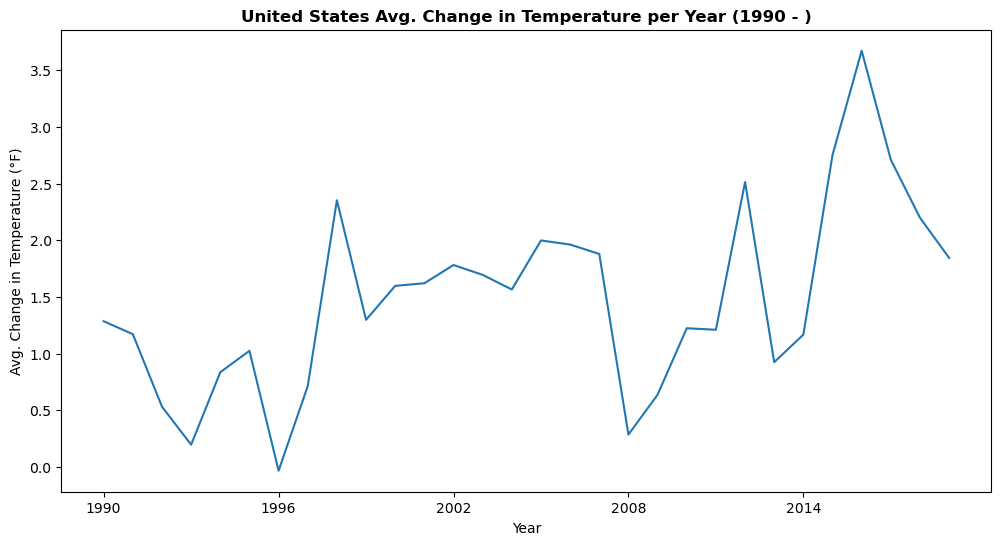

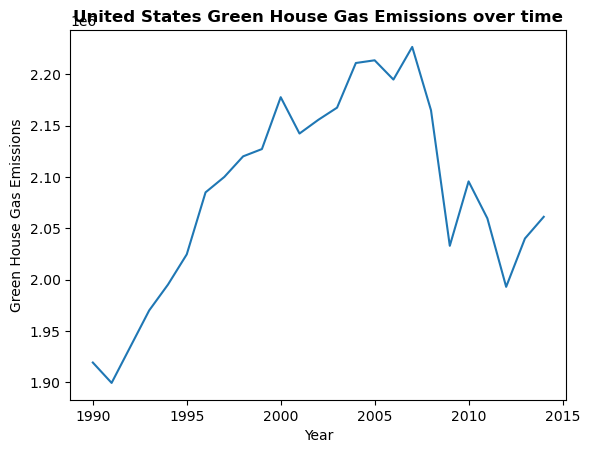

In [342]:
import numpy as np

row_index = 267

xcols = countries_grouped.columns[33:]
yvals = countries_grouped.iloc[row_index, 33:]

xcols1 = range(len(xcols))

num_ticks = 6

plt.figure(figsize=(12, 6))
plt.plot(xcols1, yvals)
plt.xlabel("Year")
plt.ylabel("Avg. Change in Temperature (°F)")
plt.title("United States Avg. Change in Temperature per Year (1990 - )", fontweight = "bold")
plt.xticks(range(0, len(xcols), num_ticks), [1990, 1996, 2002, 2008, 2014])
plt.show()

plt.plot(gg_usa_grouped.year, gg_usa_grouped.value)
plt.xlabel("Year")
plt.ylabel("Green House Gas Emissions")
plt.title("United States Green House Gas Emissions over time", fontweight = "bold")
plt.show()


There is some relationship between the two variables but it is definitely not completely linear. Greenhouse gas emissions is clearly not the only factor playing into the rising temperature of our nation.